## "Diabetes Diagnosis Using Hybrid Machine Learning and Deep Learning Approaches"

## "Diagnosis of Diabetes Mellitus Through Hybrid Analysis of Machine Learning and Deep Learning Models"

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder 
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer 
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [2]:
import tensorflow as tf 
from tensorflow import keras
from keras.layers import Dense 
from keras.models import Sequential
from keras.layers import Dropout

In [3]:
df = pd.read_csv("Diabetes_Data.csv")

In [4]:
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Male,39.0,0,0,ever,33.40,6.1,160,1
1,Male,72.0,0,0,not current,30.30,5.8,280,1
2,Male,20.0,0,0,never,26.88,6.6,220,1
3,Female,27.0,0,0,never,26.46,6.6,160,0
4,Male,37.0,0,0,current,39.91,4.0,155,0
...,...,...,...,...,...,...,...,...,...
16010,Female,45.0,0,0,never,43.76,6.0,160,0
16011,Female,36.0,0,0,current,44.42,7.0,126,1
16012,Female,24.0,0,0,never,27.56,6.1,85,0
16013,Male,57.0,1,1,not current,36.61,8.2,200,1


### EDA 

In [5]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Male,39.0,0,0,ever,33.40,6.1,160,1
1,Male,72.0,0,0,not current,30.30,5.8,280,1
2,Male,20.0,0,0,never,26.88,6.6,220,1
3,Female,27.0,0,0,never,26.46,6.6,160,0
4,Male,37.0,0,0,current,39.91,4.0,155,0


In [6]:
df.tail()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
16010,Female,45.0,0,0,never,43.76,6.0,160,0
16011,Female,36.0,0,0,current,44.42,7.0,126,1
16012,Female,24.0,0,0,never,27.56,6.1,85,0
16013,Male,57.0,1,1,not current,36.61,8.2,200,1
16014,Female,26.0,0,0,never,26.45,5.7,158,0


In [7]:
df.sample(5)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
12170,Female,23.0,0,0,current,19.44,4.5,159,0
7791,Male,36.0,0,0,former,27.32,6.5,90,0
7079,Male,77.0,0,0,ever,24.96,9.0,200,1
7169,Male,43.0,0,0,current,27.32,6.6,145,1
5978,Male,41.0,0,0,No Info,27.32,5.7,159,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16015 entries, 0 to 16014
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               16015 non-null  object 
 1   age                  16015 non-null  float64
 2   hypertension         16015 non-null  int64  
 3   heart_disease        16015 non-null  int64  
 4   smoking_history      16015 non-null  object 
 5   bmi                  16015 non-null  float64
 6   HbA1c_level          16015 non-null  float64
 7   blood_glucose_level  16015 non-null  int64  
 8   diabetes             16015 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 1.1+ MB


In [9]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')

In [10]:
df.shape

(16015, 9)

In [11]:
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,16015.000000,16015.000000,16015.000000,16015.000000,16015.000000,16015.000000,16015.000000
mean,51.278776,0.158851,0.092101,29.624355,6.206950,165.247643,0.530752
std,21.231779,0.365549,0.289178,7.433639,1.287664,57.652274,0.499069
min,0.080000,0.000000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,38.000000,0.000000,0.000000,25.980000,5.700000,130.000000,0.000000
50%,55.000000,0.000000,0.000000,27.320000,6.100000,155.000000,1.000000
75%,68.000000,0.000000,0.000000,33.050000,6.600000,200.000000,1.000000
max,80.000000,1.000000,1.000000,88.720000,9.000000,300.000000,1.000000


In [12]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [13]:
df.duplicated().sum()

np.int64(46)

In [14]:
df.drop_duplicates(inplace=True)

In [15]:
df.shape

(15969, 9)

In [16]:
df['gender'].value_counts()

gender
Female    8833
Male      7136
Name: count, dtype: int64

In [17]:
df['smoking_history'].value_counts()

smoking_history
never          5946
No Info        4250
former         2247
current        1642
not current    1131
ever            753
Name: count, dtype: int64

In [18]:
df['hypertension'].value_counts()

hypertension
0    13429
1     2540
Name: count, dtype: int64

In [19]:
categorical_cols = ['gender', 'hypertension', 'heart_disease', 'smoking_history']

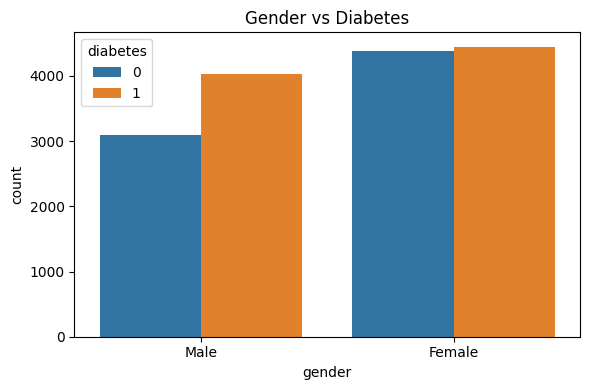

In [20]:
# Gender vs Diabetes
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='gender', hue='diabetes')
plt.title('Gender vs Diabetes')
plt.tight_layout()
plt.show()


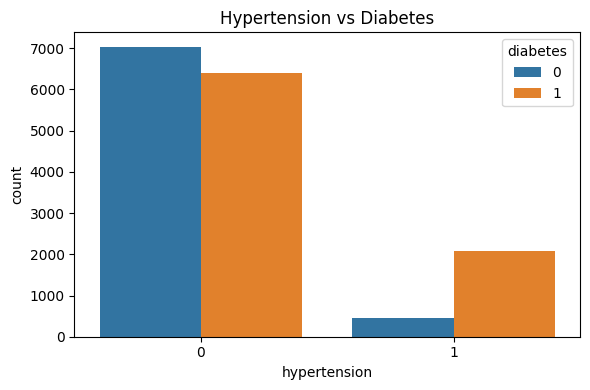

In [21]:
# Hypertension vs Diabetes
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='hypertension', hue='diabetes')
plt.title('Hypertension vs Diabetes')
plt.tight_layout()
plt.show()


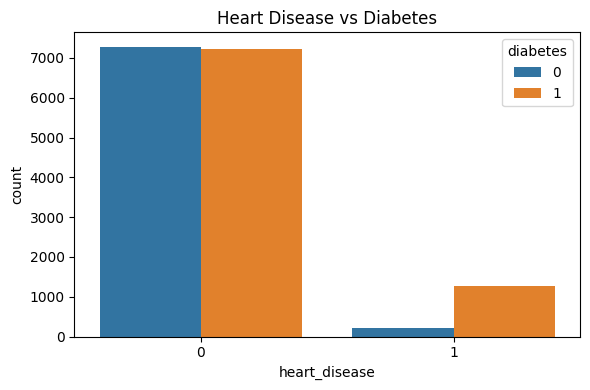

In [22]:
# Heart Disease vs Diabetes
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='heart_disease', hue='diabetes')
plt.title('Heart Disease vs Diabetes')
plt.tight_layout()
plt.show()


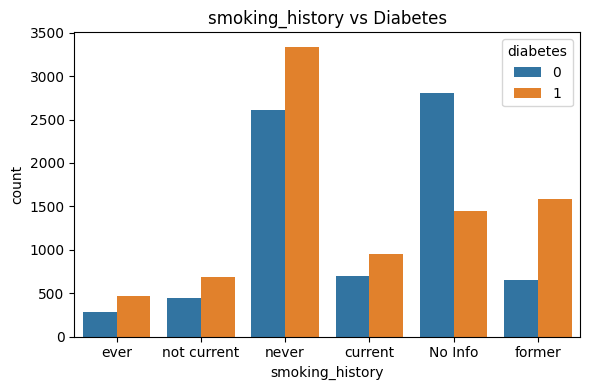

In [23]:
# Gender vs Diabetes
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='smoking_history', hue='diabetes')
plt.title('smoking_history vs Diabetes')
plt.tight_layout()
plt.show()

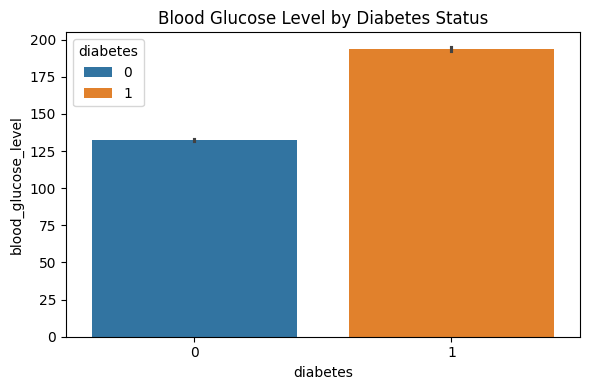

In [24]:

# Blood Glucose Level vs Diabetes
plt.figure(figsize=(6,4))
sns.barplot(data=df, x='diabetes', y='blood_glucose_level',hue='diabetes')
plt.title('Blood Glucose Level by Diabetes Status')
plt.tight_layout()
plt.show()


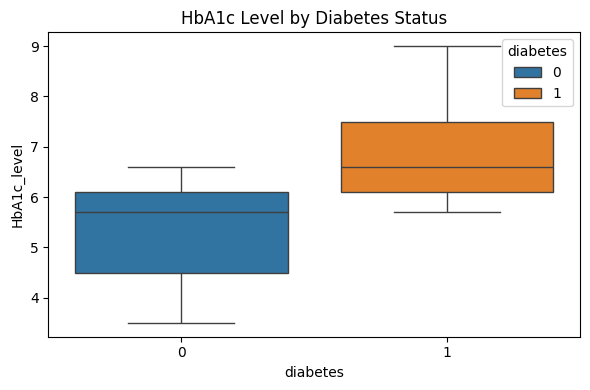

In [25]:
# HbA1c Level vs Diabetes
plt.figure(figsize=(6,4))
sns.boxplot(data=df, x='diabetes', y='HbA1c_level',hue='diabetes')
plt.title('HbA1c Level by Diabetes Status')
plt.tight_layout()
plt.show()

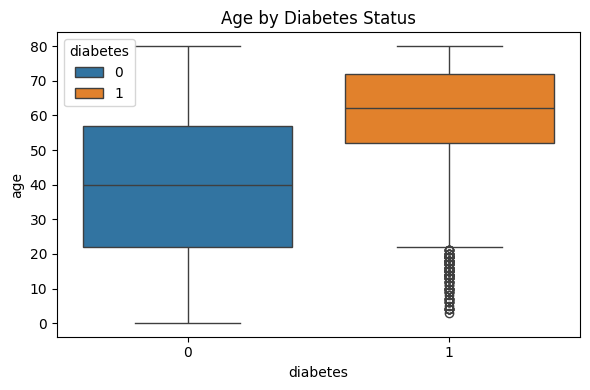

In [26]:
# Age vs Diabetes
plt.figure(figsize=(6,4))
sns.boxplot(data=df, x='diabetes', y='age',hue='diabetes')
plt.title('Age by Diabetes Status')
plt.tight_layout()
plt.show()


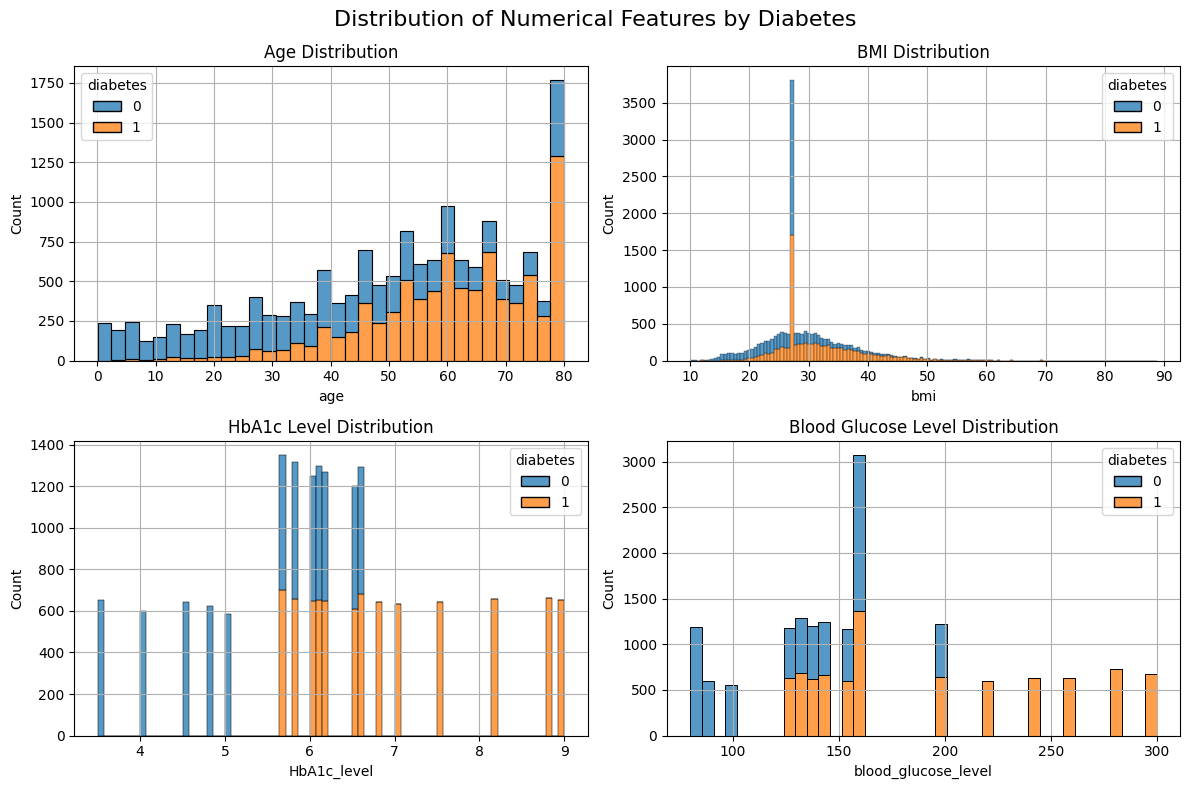

In [27]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
fig.suptitle('Distribution of Numerical Features by Diabetes', fontsize=16)

# Age Histogram
sns.histplot(data=df, x='age', hue='diabetes', multiple='stack', ax=axes[0, 0])
axes[0, 0].set_title('Age Distribution')
axes[0, 0].grid(True)  # Apply grid to this subplot

# BMI Histogram
sns.histplot(data=df, x='bmi', hue='diabetes', multiple='stack', ax=axes[0, 1])
axes[0, 1].set_title('BMI Distribution')
axes[0, 1].grid(True)  # Apply grid to this subplot

# HbA1c Level Histogram
sns.histplot(data=df, x='HbA1c_level', hue='diabetes', multiple='stack', ax=axes[1, 0])
axes[1, 0].set_title('HbA1c Level Distribution')
axes[1, 0].grid(True)  # Apply grid to this subplot

# Blood Glucose Level Histogram
sns.histplot(data=df, x='blood_glucose_level', hue='diabetes', multiple='stack', ax=axes[1, 1])
axes[1, 1].set_title('Blood Glucose Level Distribution')
axes[1, 1].grid(True)  # Apply grid to this subplot

# Adjust layout to avoid overlap
plt.tight_layout()  # Leave space for the title
plt.show()


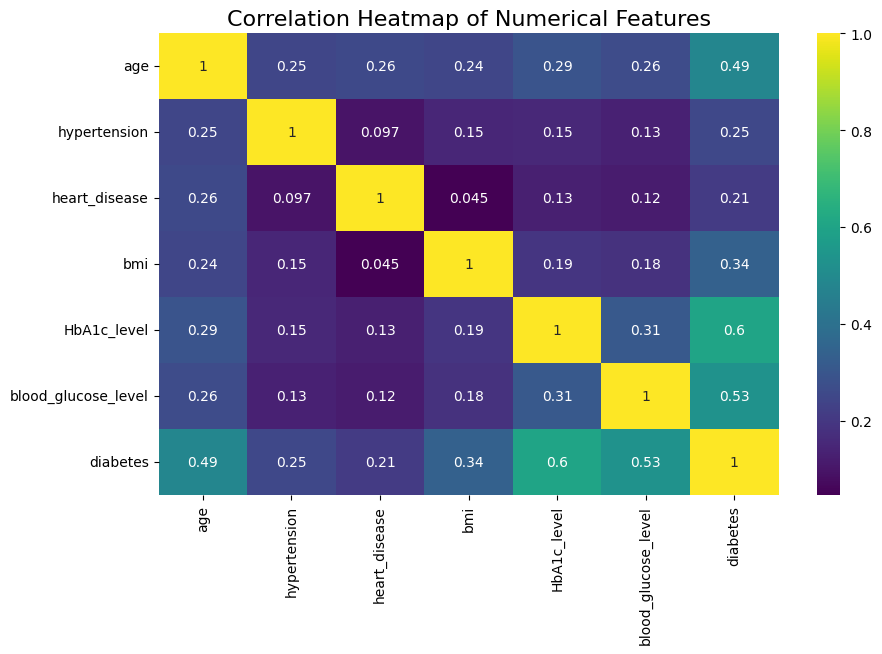

In [28]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Compute and plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='viridis')
plt.title('Correlation Heatmap of Numerical Features', fontsize=16)
plt.show()


### Feature Engineering 

In [29]:
X = df.drop(columns=['diabetes'],axis=1)
X

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level
0,Male,39.0,0,0,ever,33.40,6.1,160
1,Male,72.0,0,0,not current,30.30,5.8,280
2,Male,20.0,0,0,never,26.88,6.6,220
3,Female,27.0,0,0,never,26.46,6.6,160
4,Male,37.0,0,0,current,39.91,4.0,155
...,...,...,...,...,...,...,...,...
16010,Female,45.0,0,0,never,43.76,6.0,160
16011,Female,36.0,0,0,current,44.42,7.0,126
16012,Female,24.0,0,0,never,27.56,6.1,85
16013,Male,57.0,1,1,not current,36.61,8.2,200


In [30]:
y = df['diabetes']
y

0        1
1        1
2        1
3        0
4        0
        ..
16010    0
16011    1
16012    0
16013    1
16014    0
Name: diabetes, Length: 15969, dtype: int64

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [32]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape) 
print(y_test.shape) 

(12775, 8)
(3194, 8)
(12775,)
(3194,)


In [33]:
Column_transfomer = ColumnTransformer(
    transformers=[
        ('StandardScaler',StandardScaler(),['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']),
        ('OneHotEncoder',OneHotEncoder(drop=None),['gender']),
        ('OrdinalEncoder',OneHotEncoder(drop=None), ['smoking_history'])
    ],
    remainder='passthrough'
)

#### Testing before apply the models correctly

In [34]:
X_train_scaled = Column_transfomer.fit_transform(X_train)
X_train_scaled

array([[-2.38789126, -1.86434573, -2.09819132, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.35021576, -0.30877395,  1.54703999, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.35021576, -0.76589962,  1.54703999, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 1.35021576, -1.95711535,  0.30611019, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.31290049,  0.99268974,  0.22855207, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.64295535,  0.43741649,  1.54703999, ...,  0.        ,
         0.        ,  1.        ]])

In [35]:
X_test_scaled = Column_transfomer.transform(X_test)

In [36]:
print(X_train_scaled.shape)
print(X_test_scaled.shape)

(12775, 14)
(3194, 14)


In [37]:
clf = LogisticRegression()

In [38]:
clf.fit(X_train_scaled,y_train)

LogisticRegression()

In [39]:
clf.predict(X_test_scaled)

array([0, 0, 1, ..., 1, 0, 0])

In [40]:
accuracy_score(clf.predict(X_test_scaled),y_test)

0.8807138384470883

### Logistic Regression

In [41]:
pipeline_Logistic_Regression = Pipeline(
    steps=[
        ('Column_transformer',Column_transfomer),
        ('classifier',LogisticRegression())
    ]
)

In [42]:
pipeline_Logistic_Regression.fit(X_train,y_train)

C:\Users\sr319\OneDrive\Desktop\Project\Lib\site-packages\sklearn\compose\_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('Column_transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('StandardScaler',
                                                  StandardScaler(),
                                                  ['age', 'bmi', 'HbA1c_level',
                                                   'blood_glucose_level']),
                                                 ('OneHotEncoder',
                                                  OneHotEncoder(), ['gender']),
                                                 ('OrdinalEncoder',
                                                  OneHotEncoder(),
                                                  ['smoking_history'])])),
                ('classifier', LogisticRegression())])

In [43]:
y_pred_logistic = pipeline_Logistic_Regression.predict(X_test)
y_pred_logistic

array([0, 0, 1, ..., 1, 0, 0])

In [44]:
accuracy_score_logistic = accuracy_score(y_pred_logistic,y_test)
accuracy_score_logistic

0.8807138384470883

In [45]:
cm_logistic_regression = confusion_matrix(y_test, y_pred_logistic)
cm_logistic_regression

array([[1328,  196],
       [ 185, 1485]])

In [46]:
# checking overfitting or underfitting 
y_train_pred = pipeline_Logistic_Regression.predict(X_train)
y_test_pred = pipeline_Logistic_Regression.predict(X_test)

# Accuracy
train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)


print(f"Train Accuracy: {train_acc:.2f}")
print(f"Test Accuracy: {test_acc:.2f}")


Train Accuracy: 0.89
Test Accuracy: 0.88


### Random Forest

In [47]:
pipeline_RandomForest = Pipeline(
    steps=[
        ('Column_transformer',Column_transfomer),
        ('classifier',RandomForestClassifier(max_depth=10, random_state=42))
    ]
)

In [48]:
pipeline_RandomForest.fit(X_train,y_train)

C:\Users\sr319\OneDrive\Desktop\Project\Lib\site-packages\sklearn\compose\_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('Column_transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('StandardScaler',
                                                  StandardScaler(),
                                                  ['age', 'bmi', 'HbA1c_level',
                                                   'blood_glucose_level']),
                                                 ('OneHotEncoder',
                                                  OneHotEncoder(), ['gender']),
                                                 ('OrdinalEncoder',
                                                  OneHotEncoder(),
                                                  ['smoking_history'])])),
                ('classifier',
                 RandomForestClassifier(max_depth=10, random_state=42))])

In [49]:
y_pred_RandomForest = pipeline_RandomForest.predict(X_test)
y_pred_RandomForest

array([0, 0, 1, ..., 1, 1, 0])

In [50]:
accuracy_score_rf = accuracy_score(y_pred_RandomForest,y_test)
accuracy_score_rf

0.9079524107701941

In [51]:
cm_r_forest = confusion_matrix(y_pred_RandomForest,y_test)
cm_r_forest

array([[1354,  124],
       [ 170, 1546]])

In [52]:
# checing overfitting and underfitting
y_train_pred = pipeline_RandomForest.predict(X_train)
y_test_pred = pipeline_RandomForest.predict(X_test)


train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)


print(f"Train Accuracy: {train_acc:.2f}")
print(f"Test Accuracy: {test_acc:.2f}")

Train Accuracy: 0.92
Test Accuracy: 0.91


### Decision Tree

In [53]:
pipeline_Decision_Tree = Pipeline(
    steps=[
        ('Column_transformer',Column_transfomer),
        ('classifier',DecisionTreeClassifier())
    ]
)

In [54]:
pipeline_Decision_Tree.fit(X_train,y_train)

C:\Users\sr319\OneDrive\Desktop\Project\Lib\site-packages\sklearn\compose\_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('Column_transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('StandardScaler',
                                                  StandardScaler(),
                                                  ['age', 'bmi', 'HbA1c_level',
                                                   'blood_glucose_level']),
                                                 ('OneHotEncoder',
                                                  OneHotEncoder(), ['gender']),
                                                 ('OrdinalEncoder',
                                                  OneHotEncoder(),
                                                  ['smoking_history'])])),
                ('classifier', DecisionTreeClassifier())])

In [55]:
y_pred_Decision_Tree = pipeline_Decision_Tree.predict(X_test)
y_pred_Decision_Tree

array([0, 0, 1, ..., 1, 0, 0])

In [56]:
accuracy_score_decision_tree = accuracy_score(y_pred_Decision_Tree,y_test)
accuracy_score_decision_tree

0.8731997495303695

In [57]:
cm_r_Decision_Tree = confusion_matrix(y_pred_RandomForest,y_test)
cm_r_Decision_Tree

array([[1354,  124],
       [ 170, 1546]])

### KNN

In [58]:
pipeline_KNN = Pipeline(
    steps=[
        ('Column_transfomer',Column_transfomer),
        ('KNN',KNeighborsClassifier())
    ]
)

In [59]:
pipeline_KNN.fit(X_train,y_train)

C:\Users\sr319\OneDrive\Desktop\Project\Lib\site-packages\sklearn\compose\_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('Column_transfomer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('StandardScaler',
                                                  StandardScaler(),
                                                  ['age', 'bmi', 'HbA1c_level',
                                                   'blood_glucose_level']),
                                                 ('OneHotEncoder',
                                                  OneHotEncoder(), ['gender']),
                                                 ('OrdinalEncoder',
                                                  OneHotEncoder(),
                                                  ['smoking_history'])])),
                ('KNN', KNeighborsClassifier())])

In [60]:
y_pred_KNN = pipeline_KNN.predict(X_test)
y_pred_KNN

array([1, 0, 1, ..., 1, 1, 0])

In [61]:
accuracy_score_KNN = accuracy_score(y_pred_KNN,y_test)
accuracy_score_KNN

0.8857232310582341

In [62]:
cm_KNN = confusion_matrix(y_pred_KNN,y_test)
cm_KNN

array([[1314,  155],
       [ 210, 1515]])

### Support Vector Machine

In [63]:
pipeline_SVM = Pipeline(
    steps=[
        ('tranformer',Column_transfomer),
        ('SVM',SVC())
    ]
)

In [64]:
pipeline_SVM.fit(X_train,y_train)

C:\Users\sr319\OneDrive\Desktop\Project\Lib\site-packages\sklearn\compose\_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('tranformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('StandardScaler',
                                                  StandardScaler(),
                                                  ['age', 'bmi', 'HbA1c_level',
                                                   'blood_glucose_level']),
                                                 ('OneHotEncoder',
                                                  OneHotEncoder(), ['gender']),
                                                 ('OrdinalEncoder',
                                                  OneHotEncoder(),
                                                  ['smoking_history'])])),
                ('SVM', SVC())])

In [65]:
y_pred_SVM = pipeline_SVM.predict(X_test)
y_pred_SVM

array([0, 0, 1, ..., 1, 1, 0])

In [66]:
accuracy_score_SVM = accuracy_score(y_pred_SVM,y_test)
accuracy_score_SVM

0.9041953663118347

In [67]:
cm_SVM = confusion_matrix(y_pred_SVM,y_test)
cm_SVM

array([[1344,  126],
       [ 180, 1544]])

### Accuaccuracy_score and Cofusin Matrix of each Algorithm

In [68]:
algorithms = ['logistic_regression','random_forest','decision_tree','KNN','SVM']
accuracy_score_of_alg = [accuracy_score_logistic*100,accuracy_score_rf*100,accuracy_score_decision_tree*100,accuracy_score_KNN*100,accuracy_score_SVM*100]

Text(0.5, 1.0, 'accuracy score of each algorithm')

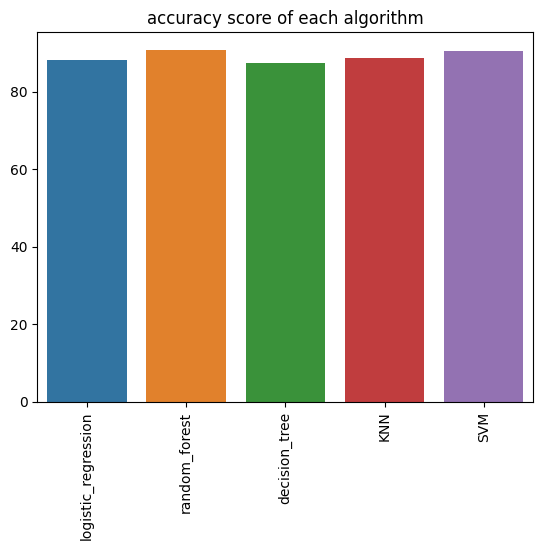

In [69]:
sns.barplot(x=algorithms,y=accuracy_score_of_alg,hue=algorithms)
plt.xticks(rotation=90)
plt.title("accuracy score of each algorithm")

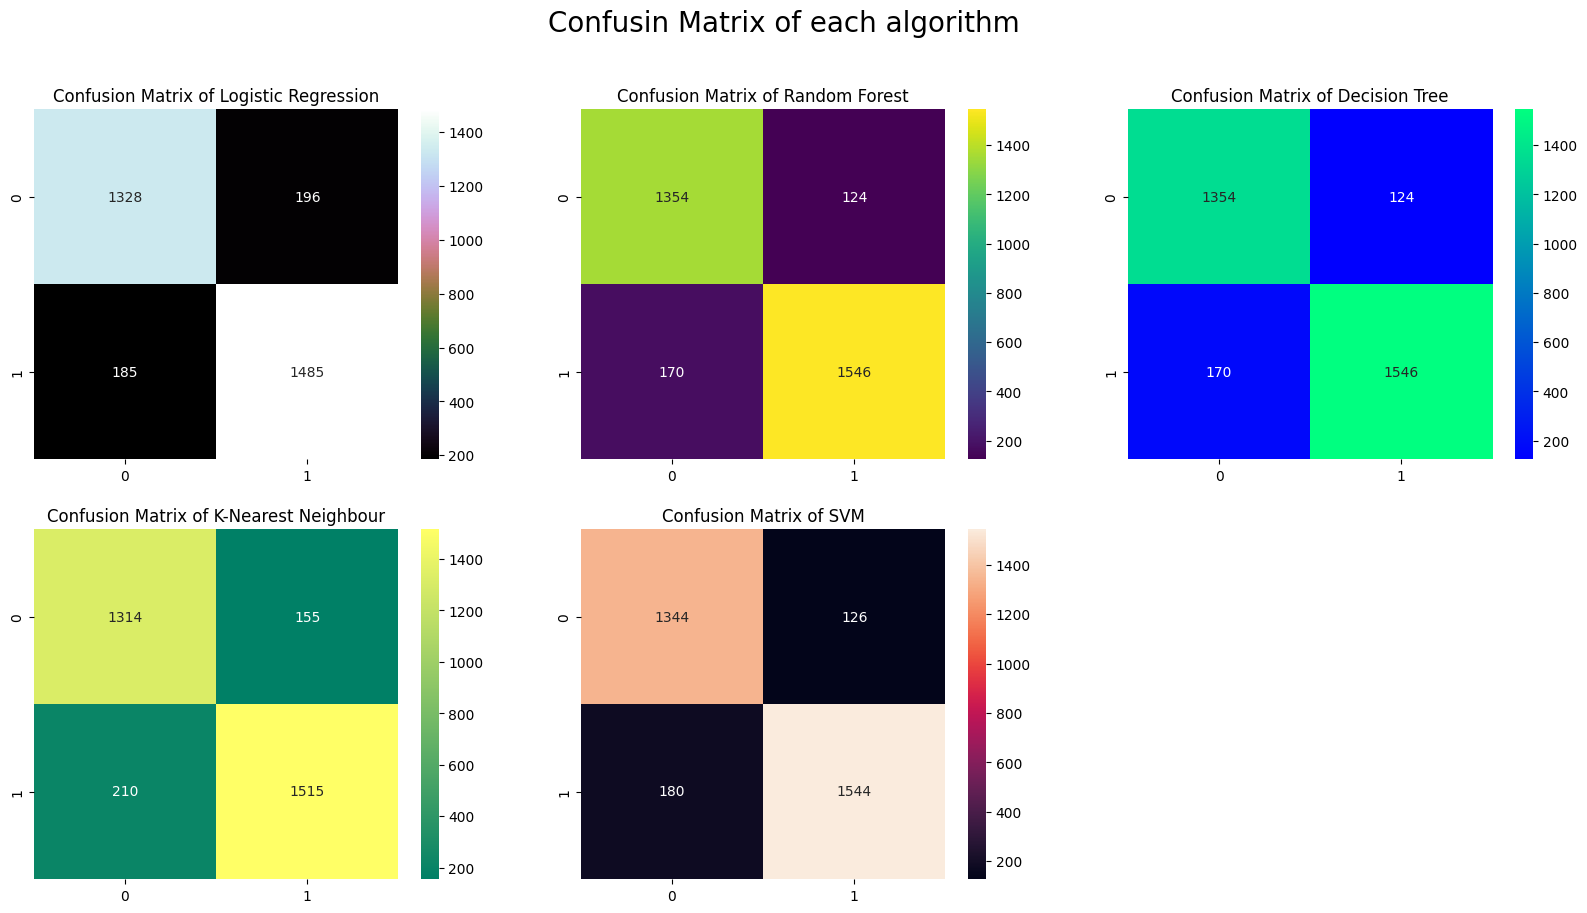

In [70]:
fig, ax = plt.subplots(ncols=3,nrows=2,figsize=(20,10))
fig.suptitle('Confusin Matrix of each algorithm',fontsize=20)


sns.heatmap(cm_logistic_regression,annot=True,fmt='d',cmap='cubehelix',ax=ax[0,0])
ax[0,0].set_title('Confusion Matrix of Logistic Regression')

# Random Forest
sns.heatmap(cm_r_forest,annot=True,fmt='d',cmap='viridis',ax=ax[0,1])
ax[0,1].set_title('Confusion Matrix of Random Forest')

# Decision Tree
sns.heatmap(cm_r_Decision_Tree,annot=True,fmt='d',cmap='winter',ax=ax[0,2])
ax[0,2].set_title('Confusion Matrix of Decision Tree')


#KNN
sns.heatmap(cm_KNN,annot = True,fmt='d',cmap='summer',ax=ax[1,0])
ax[1,0].set_title('Confusion Matrix of K-Nearest Neighbour')


# SVM 
sns.heatmap(cm_SVM,annot=True,fmt='d',ax=ax[1,1])
ax[1,1].set_title("Confusion Matrix of SVM")

ax[1, 2].set_visible(False)

plt.show()

### ANN

In [71]:
model = Sequential()

In [72]:
X_train_scaled.shape

(12775, 14)

In [73]:
# input layer
model.add(Dense(18, input_shape=(14,), activation='relu')) 
model.add(Dropout(0.2))

# layer 1
model.add(Dense(28, activation='relu'))
model.add(Dropout(0.4))

# layer 2
model.add(Dense(10, activation='relu'))
model.add(Dropout(0.4))

# output layer 
model.add(Dense(1, activation='sigmoid'))   

C:\Users\sr319\OneDrive\Desktop\Project\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [74]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [75]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 18)                  │             270 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 18)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 28)                  │             532 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 28)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             290 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 10)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,103 (4.31 KB)

 Trainable params: 1,103 (4.31 KB)

 Non-trainable params: 0 (0.00 B)

In [76]:
# Fit the model
history = model.fit(X_train_scaled,y_train, epochs=50, batch_size=120, validation_split=0.2)

Epoch 1/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.5457 - loss: 0.7055 - val_accuracy: 0.8650 - val_loss: 0.4877
Epoch 2/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7847 - loss: 0.4813 - val_accuracy: 0.8736 - val_loss: 0.2946
Epoch 3/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8511 - loss: 0.3500 - val_accuracy: 0.8861 - val_loss: 0.2679
Epoch 4/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8726 - loss: 0.3133 - val_accuracy: 0.8881 - val_loss: 0.2630
Epoch 5/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8752 - loss: 0.3107 - val_accuracy: 0.8885 - val_loss: 0.2584
Epoch 6/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8769 - loss: 0.2999 - val_accuracy: 0.8877 - val_loss: 0.2570
Epoch 7/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8870 - loss: 0.2848 - val_accuracy: 0.8853 - val_loss: 0.2547
Epoch 8/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8792 - loss: 0.2929 - val_accuracy: 0.8857 - val_loss:

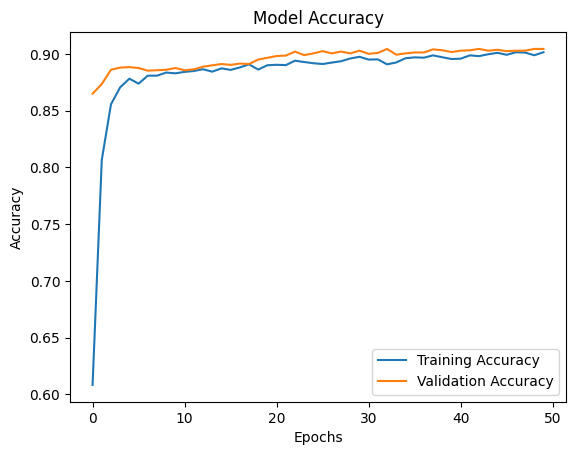

In [77]:

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


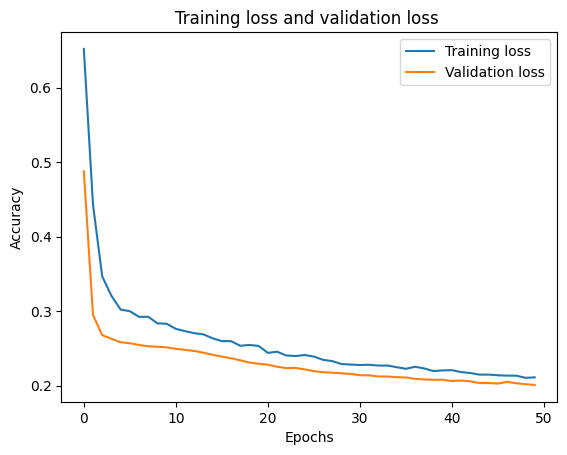

In [78]:

plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('Training loss and validation loss ')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [79]:
# After training your model
y_pred_prob = model.predict(X_test_scaled)  # Predictions between 0 and 1

# Convert probabilities to binary (0 or 1) using a threshold (e.g., 0.5)
y_pred = (y_pred_prob > 0.5).astype("int32")  # This gives you the predicted class (0 or 1)

# Print the predictions
print("Predictions: ", y_pred)


100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Predictions:  [[0]
 [0]
 [1]
 ...
 [1]
 [1]
 [0]]


In [83]:
 df['smoking_history'].value_counts().index

Index(['never', 'No Info', 'former', 'current', 'not current', 'ever'], dtype='object', name='smoking_history')

## df